<a href="https://colab.research.google.com/github/Durga-s-02/EV/blob/main/Geographic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pyshp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.6 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
import warnings
warnings.filterwarnings("ignore")

In [6]:
cs_highway = pd.read_csv("CS_Highway.csv")
cs_highway

,Sl. No.,Highways/Expressways,Charging Stations
0,1,Mumbai - Pune Expressway,10
1,2,Surat-Mumbai Expressway,30
2,3,Mumbai - Delhi Highway,124
3,4,Mumbai - Panaji Highway,60
4,5,Mumbai - Nagpur Highway,70
5,6,Mumbai - Bengaluru Highway,100
6,7,Agra-Nagpur,80
7,8,Kolkata- Nagpur,120
8,9,Chennai- Nagpur,114
9,Total,Total,708


In [7]:
cs_highway = cs_highway.iloc[:-1,:] # discarding the last row


In [8]:
#Sanctioned Charging Stations
cs_sanctioned = pd.read_csv("CS_Sanctioned.csv")
cs_sanctioned

,State/UT-wise,Number of Electric Vehicle Charging Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,256
3,Gujarat,228
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,159
8,West Bengal,141
9,Telangana,138


In [12]:
def get_data(df):
    d_mh = pd.read_excel(df,skiprows = [0,1]) # skipping first 2 rows
    d_mh.rename(columns=d_mh.iloc[0], inplace = True) # renaming 1st column
    d_mh = d_mh.iloc[1:,1:]
    d_mh.rename(columns = {' Vehicle Class ': "Vehicle Class"}, inplace = True)
    d_mh = d_mh[["CNG ONLY","DIESEL","ELECTRIC(BOV)","PETROL"]] # selecting main fuel types
    return d_mh


In [13]:
get_data("type_maharashtra.xlsx")

,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
1,0,421,5,"7,225"
2,0,"6,61,896",8,470
3,35,"10,347",1,"4,271"
4,1,17,0,1
5,0,"31,174",0,0
...,...,...,...,...
67,0,370,0,1
68,4,"2,380",1,3
69,0,"1,143",4,4
70,0,19,0,143


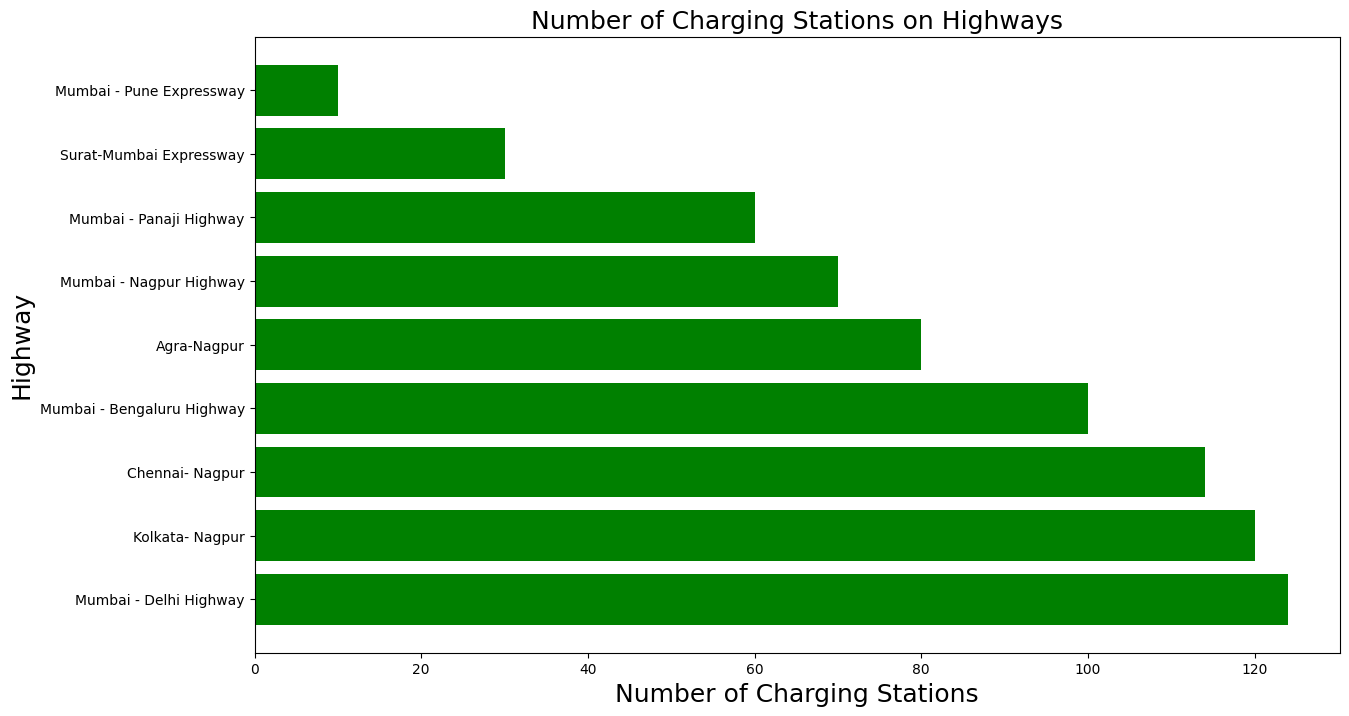

In [15]:
#Charging stations on highway
def plot_frequency(data,feature1,feature2,x_lbl,y_lbl,text,color):
    new_df = data
    new = new_df.sort_values(by=[feature2],ascending=False) # sorting in descending order
    plt.figure(figsize=(14, 8))
    x_state = list(new[feature1].values) # defining x axis
    y_state = list(new[feature2].values) # defining y axis (count of numericl entity)
    plt.barh(x_state,y_state, color = color)
    plt.xlabel(x_lbl, fontsize=18) # xlabel
    plt.ylabel(y_lbl, fontsize=18) # ylabel
    plt.title(text, fontsize = 18)
    return plt.show()
plot_frequency(cs_highway,"Highways/Expressways","Charging Stations", "Number of Charging Stations",
               "Highway","Number of Charging Stations on Highways",'green')

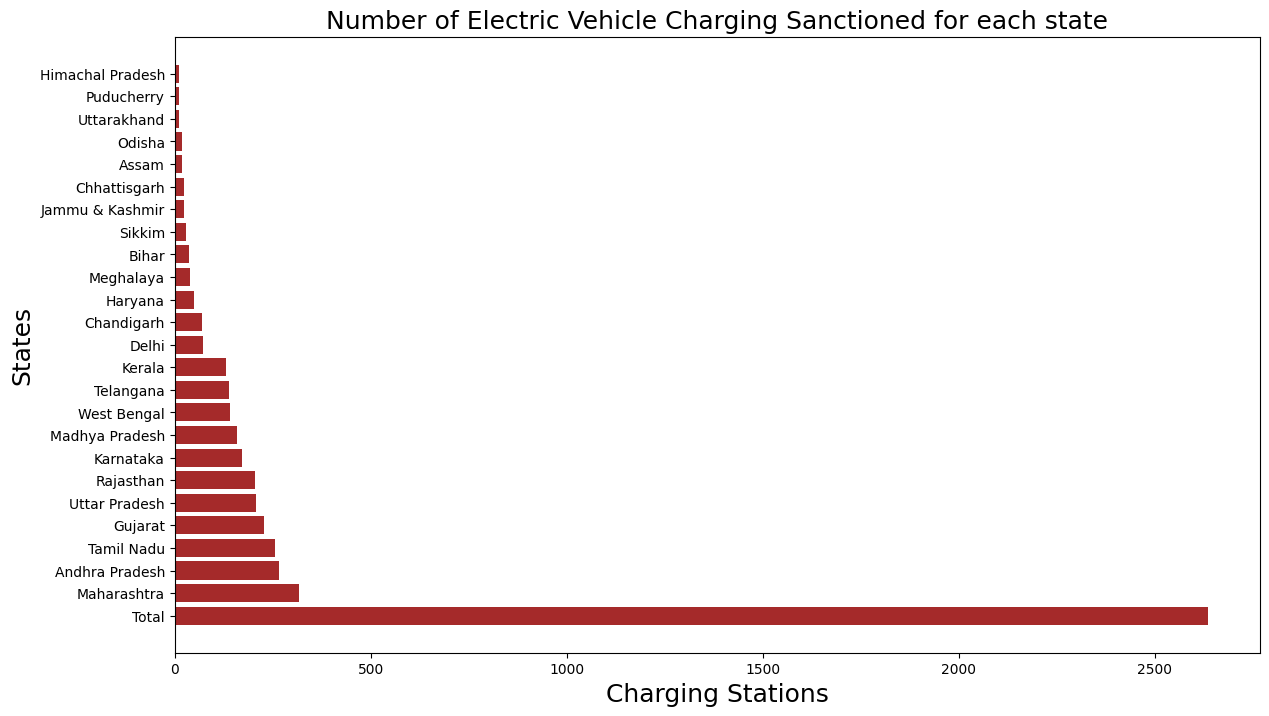

In [16]:
#Sanctioned Charging Stations
plot_frequency(cs_sanctioned,'State/UT-wise','Number of Electric Vehicle Charging Sanctioned','Charging Stations','States',
               'Number of Electric Vehicle Charging Sanctioned for each state','brown')

In [24]:
imp_vehicle = ["BUS", "E-RICKSHAW(P)","M-CYCLE/SCOOTER","M-CYCLE/SCOOTER-WITH SIDE CAR","MOPED","MOTOR CAB","MOTOR CAR",
               "OMNI BUS","THREE WHEELER (GOODS)","THREE WHEELER (PASSENGER)","THREE WHEELER (PERSONAL)",
               "E-RICKSHAW WITH CART (G)"]

In [44]:
def get_all_data(state,state_name):
    """
    This function combines the data for electric vehicle across few states

    """
    data = get_data(state)
    idx = []
    for i in range(data.shape[0]):
        if data.iloc[i]['Vehicle Class'] in imp_vehicle:
            idx.append(i)
    frame = data.iloc[idx]
    new_frame = frame.reset_index().drop(["index"], axis=1)
    new_frame["ELECTRIC(BOV)"] = [z.replace(',','') for z in new_frame["ELECTRIC(BOV)"].values]
    new_frame["ELECTRIC(BOV)"] = new_frame["ELECTRIC(BOV)"].astype(float)
    new_frame['State'] = [state_name for i in range(new_frame.shape[0])]
    return new_frame[["ELECTRIC(BOV)","State"]]

In [37]:
# list of name of csv files of every state
data_files = ["type_AP.xlsx","type_assam.xlsx","type_bihar.xlsx","type_chandigarh.xlsx","type_chhatisgarh.xlsx",
              "type_Delhi.xlsx","type_guj.xlsx","type_haryana.xlsx","type_HP.xlsx","type_jammu.xlsx","type_karnataka.xlsx",
              "type_kerala.xlsx","type_maharashtra.xlsx","type_meghalaya.xlsx","type_MP.xlsx","type_odisha.xlsx",
              "type_puducherry.xlsx","type_rajasthan.xlsx","type_sikkim.xlsx","type_TN.xlsx","type_UP.xlsx",
              "type_uttarakhand.xlsx","type_WB.xlsx"]

In [38]:
# list of state names, these will be column values
states = ["Andhra Pradesh","Assam","Bihar","Chandigarh","Chhatisgarh","Delhi","Gujarat","Haryana","Himachal Pradesh",
         "Jammu & Kashmir","Karnataka","Kerala","Maharashtra","Meghalaya","Madhya Pradesh","Odisha","Puducherry",
          "Rajasthan","Sikkim","Tamil Nadu","Uttar Pradesh","Uttarakhand","West Bengal"]

By using these individual states csv files , we can find every individual states data
